In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, GridSearchCV,RepeatedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant
from xgboost import XGBRegressor



In [3]:
df = pd.read_csv('cleaned_data_2.csv')

In [4]:
df.head()

Name  Platform  Year_of_Release  Genre Publisher  \
0             Wii Sports        12             2006     10  Nintendo   
1         Mario Kart Wii        12             2008      6  Nintendo   
2      Wii Sports Resort        12             2009     10  Nintendo   
3  New Super Mario Bros.         2             2006      4  Nintendo   
4               Wii Play        12             2006      3  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     15.68     12.76      3.79         3.29         35.52          82.0   
2     15.61     10.93      3.28         2.95         32.77          80.0   
3     11.28      9.14      6.50         2.88         29.80          89.0   
4     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count  User_Score  User_Count Developer  Rating Score_class  
0          51.0         8.0       322.0  Nintendo       1     Average  
1          73.0         8.3       709.0  Nintendo       1        High  
2          73.0         8.0       192.0  Nintendo       1        High  
3          65.0         8.5       431.0  Nintendo       1        High  
4          41.0         6.6       129.0  Nintendo       1         Low

In [18]:
y= df['Critic_Score']
X = df.drop(['Critic_Score','Name','Publisher','Developer','Score_class','Other_Sales'], axis=1)

In [19]:
X

Platform  Year_of_Release  Genre  NA_Sales  EU_Sales  JP_Sales  \
0           12             2006     10     41.36     28.96      3.77   
1           12             2008      6     15.68     12.76      3.79   
2           12             2009     10     15.61     10.93      3.28   
3            2             2006      4     11.28      9.14      6.50   
4           12             2006      3     13.96      9.18      2.93   
...        ...              ...    ...       ...       ...       ...   
6817         3             2001      0      0.01      0.00      0.00   
6818         3             2002      2      0.01      0.00      0.00   
6819         5             2014      0      0.00      0.01      0.00   
6820         5             2011      8      0.01      0.00      0.00   
6821         5             2011     11      0.00      0.01      0.00   

      Global_Sales  Critic_Count  User_Score  User_Count  Rating  
0            82.53          51.0         8.0       322.0       1  
1            35.52          73.0         8.3       709.0       1  
2            32.77          73.0         8.0       192.0       1  
3            29.80          65.0         8.5       431.0       1  
4            28.92          41.0         6.6       129.0       1  
...            ...           ...         ...         ...     ...  
6817          0.01           4.0         2.4        21.0       1  
6818          0.01          12.0         8.8         9.0       4  
6819          0.01          20.0         7.6       412.0       4  
6820          0.01          12.0         5.8        43.0       6  
6821          0.01          12.0         7.2        13.0       2  

[6822 rows x 11 columns]

In [20]:
# Standardizing predictor, X_train, and adding constant term 

X_standard = X.apply(lambda x: (x - x.mean())/x.std())
X_aug = add_constant(X_standard)
y_standard = (y - y.mean())/y.std()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

In [22]:
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (5457, 11)
Test shape: (1365, 11)


### MultiLinear Regression + Cross Validation

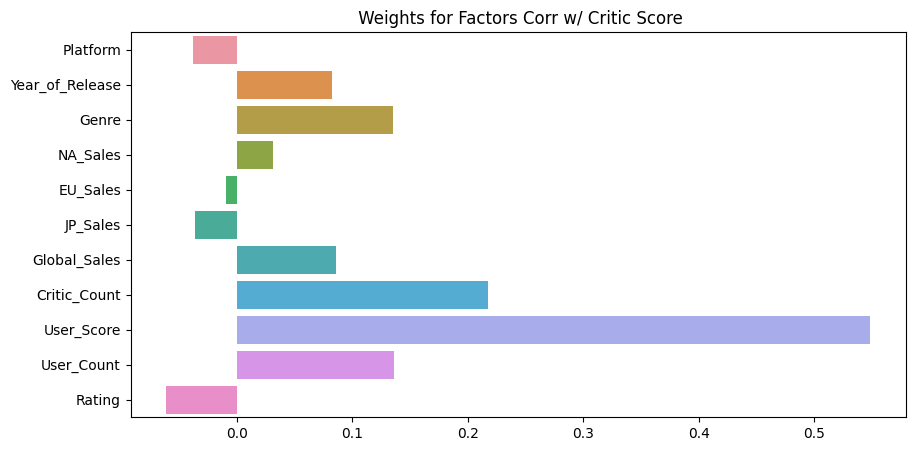

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     578.3
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:10:06   Log-Likelihood:                -7429.5
No. Observations:                6822   AIC:                         1.488e+04
Df Residuals:                    6810   BIC:                         1.496e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.868e-16      0.009  -2.14e-14      1.000      -0.017       0.017
Platform           -0.0373      0.009     -4.026      0.000      -0.056      -0.019
Year_of_Release     0.0829      0.010      8.588      0.000       0.064       0.102
Genre               0.1354      0.009     15.182      0.000       0.118       0.153
NA_Sales            0.0312      0.056      0.560      0.576      -0.078       0.140
EU_Sales           -0.0091      0.042     -0.218      0.828      -0.091       0.073
JP_Sales           -0.0361      0.018     -2.039      0.042      -0.071      -0.001
Global_Sales        0.0861      0.096      0.893      0.372      -0.103       0.275
Critic_Count        0.2180      0.010     21.007      0.000       0.198       0.238
User_Score          0.5485      0.009     58.344      0.000       0.530       0.567
User_Count          0.1365      0.010     13.868      0.000       0.117       0.156
Rating             -0.0611      0.009     -6.714      0.000      -0.079      -0.043
==============================================================================
Omnibus:                      160.942   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.818
Skew:                          -0.318   Prob(JB):                     8.19e-43
Kurtosis:                       3.526   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
res = OLS(y_standard, X_aug).fit()
weights=res.params

plt.figure(figsize=(10,5))
sns.barplot(y=weights[1:].index, x=weights[1:].values)
plt.title(' Weights for Factors Corr w/ Critic Score')
plt.show()
res.summary()

In [24]:
## Eval coefficients in df
coeff  = pd.DataFrame()
coeff['Columns'] = X_train.columns
coeff['Linear_Regression_Coeff'] = pd.Series(mlr.coef_)
coeff

Columns  Linear_Regression_Coeff
0          Platform                -0.104238
1   Year_of_Release                 0.281118
2             Genre                 0.498326
3          NA_Sales                -6.392904
4          EU_Sales                -7.879743
5          JP_Sales                -8.681313
6      Global_Sales                -7.424414
7      Critic_Count                 7.705928
8        User_Score                 0.157392
9        User_Count                 5.270369
10           Rating                 0.003180

* R-squared/Adj R-sqrd is used to indicate the porportion of variance thats explained by my predictor variables, which in this case 48.3% of Critic Score variance can be explained by dependent var ~ which can suggest that dependent variables are not significantlly improving model. 

In [25]:
# Creating multilinear reg function
def multilinear_regression_model(ind_var, dep_var):
    # Fitting and pred of x,y on linearmodel
    globals() ['mlr'] = LinearRegression().fit(ind_var, dep_var)
    globals() ['yhat_mlr'] = mlr.predict(ind_var)
    globals() ['col_used'] = [ind_var.columns[i] for i, value in enumerate(ind_var.columns)]

    # Printing explained var ~ R-sqrd
    globals() ['r_squared'] = mlr.score(ind_var, dep_var)
    print(f'\n\n\033[1mThe R-Sqaured is: {r_squared}\033[0m')
    print(f'We can say that \033[1m~{round(r_squared*100,2)}%\033[0m of the variation of the {dep_var.name} is explained by the multilinear model')

    #Plot dist of act vs fitted scores
    plt.figure(figsize=(10,5))
    ax1= sns.distplot(dep_var, hist=False, color='r', label = 'Actual Value')
    sns.distplot(yhat_mlr, hist=False, color = 'blue', label='Predicted Values', ax=ax1)
    plt.title('Actual v Fitted Values')
    plt.xlabel(dep_var.name.title())
    plt.ylabel('Proportion of Critic Score')
    plt.legend()
    plt.show()
    plt.close()



The R-Sqaured is: 0.4802082929166077
We can say that ~48.02% of the variation of the Critic_Score is explained by the multilinear model


/var/folders/18/920vt1r90t39q35zb6glj_6h0000gn/T/ipykernel_2052/2827502554.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1= sns.distplot(dep_var, hist=False, color='r', label = 'Actual Value')
/var/folders/18/920vt1r90t39q35zb6glj_6h0000gn/T/ipykernel_2052/2827502554.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2

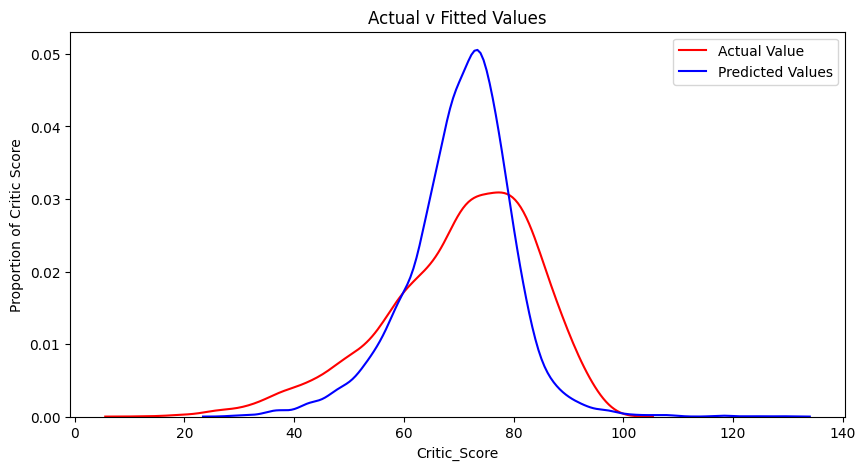

In [26]:
multilinear_regression_model(X_train ,y_train)

In [42]:
# Creating multilinear reg function
def cv_multilinear_regression_model(ind_var, dep_var,folds):
    # Fitting and pred of x,y on linearmodel
    globals() ['mlr'] = LinearRegression()
    globals() ['yhat_cv_mlr'] = cross_val_predict(mlr, X_train,y_train, cv=folds)
    globals() ['col_used'] = [ind_var.columns[i] for i, value in enumerate(ind_var.columns)]

    #CV r2 scores
    def get_cv(model, folds):
        globals()['cv_scores'] = cross_val_score(model, X_train, y_train, cv=folds, scoring='r2')
    get_cv(mlr,folds)
    # Printing explained var ~ R-sqrd
    globals() ['cv_r_squared'] = np.mean(cv_scores)
    print(f'\n\n\033[1mThe Cross Validated R-Sqaured is: {cv_r_squared}\033[0m')
    print(f'We can say that \033[1m~{round(cv_r_squared*100,2)}%\033[0m of the variation of the {dep_var.name} is explained by the multilinear model')
    globals()['mse'] = mean_squared_error(y_train, yhat_cv_mlr)
    print(f'\033[1mThe Mean Squared Error of predicted values is: \033[0m',mse)

    #Plot dist of act vs fitted scores
    plt.figure(figsize=(10,5))
    ax1= sns.distplot(dep_var, hist=False, color='r', label = 'Actual Value')
    sns.distplot(yhat_mlr, hist=False, color = 'blue', label='Cross Val Predicted Values', ax=ax1)
    plt.title('Actual v Predicted Values')
    plt.xlabel(dep_var.name.title())
    plt.ylabel('Proportion of Critic Score')
    plt.legend()
    plt.show()
    plt.close()



The Cross Validated R-Sqaured is: 0.4732822396220035
We can say that ~47.33% of the variation of the Critic_Score is explained by the multilinear model
The Mean Squared Error of predicted values is:  100.07632487179922


/var/folders/18/920vt1r90t39q35zb6glj_6h0000gn/T/ipykernel_2052/1288105837.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1= sns.distplot(dep_var, hist=False, color='r', label = 'Actual Value')
/var/folders/18/920vt1r90t39q35zb6glj_6h0000gn/T/ipykernel_2052/1288105837.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2

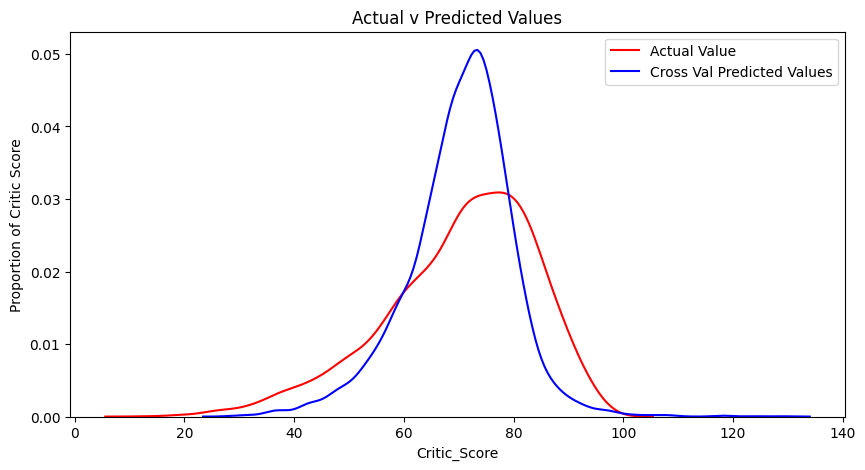

In [43]:
cv_multilinear_regression_model(X_train,y_train,5)

### Lasso Regression GridSearch

In [49]:
param_grid = {'alpha': [0,0.0001,0.001,0.001,0.05,0.1],
              'fit_intercept': [True, False]}

In [51]:
lasso = Lasso(random_state= 42)
lasso_grid= GridSearchCV(lasso, param_grid, scoring = 'r2', verbose =1, n_jobs =-1, cv=20)
lasso_grid_results = lasso_grid.fit(X_train, y_train)
print(f'Best Scores:',{lasso_grid_results.best_score_})
print(f'Best Parameteres:', lasso_grid_results.best_params_)

Fitting 20 folds for each of 12 candidates, totalling 240 fits


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/l

Best Scores: {0.47146957973771475}
Best Parameteres: {'alpha': 0.1, 'fit_intercept': True}


### Random Forest Regressor w/ GridSearchCV

In [60]:
rf_param_grid={
               'max_depth': [15,20],
               'ccp_alpha': [0.0,0.2,0.4],
               'n_estimators':[15,20,25]}

In [61]:
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, scoring = 'r2', verbose=2, n_jobs=-1, cv=50)
rf_grid_results = rf_grid.fit(X_train, y_train)
print(f'Best Random Forest Scores:', rf_grid_results.best_score_)
print(f'Best Random Forest Params:', rf_grid_results.best_params_)

Fitting 50 folds for each of 18 candidates, totalling 900 fits
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.6s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.6s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.6s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.6s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.6s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.6s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.6s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.6s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.6s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.6s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.6s
[CV] END .......ccp_alpha=0.0, max_depth=15, n

In [62]:
print(f"Randomized Forest Regressor model's Test score: {round(rf_grid_results.best_estimator_.score(X_test, y_test)*100,2)}")

Randomized Forest Regressor model's Test score: 61.07


### XGBoost Regression 

In [75]:
xgb_params = {'booster': ['gbtree','gblinear','dart'],
            #   'max_depth':[10,15,20],
              'subsample':[0.1,1,5],
              'objective':['reg:squarederror']}

In [76]:
xgb_grid= GridSearchCV(XGBRegressor(random_state=42), xgb_params, scoring = 'r2', n_jobs=-1, cv=5)
xgb_grid_results = xgb_grid.fit(X_train, y_train)
print(f'Best XGB Score:', xgb_grid_results.best_score_)
print(f'Best XGB Params:', xgb_grid_results.best_params_)

[17:14:52] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_depth", "subsample" } are not used.

[17:14:52] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_depth", "subsample" } are not used.

[17:14:52] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_depth", "subsample" } are not used.

[17:14:52] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_depth", "subsample" } are not used.

[17:14:52] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_depth", "subsample" } are not used.

[17:14:52] WARNING: 

In [77]:
print(f"XGBRegressor model's Test score: {round(xgb_grid_results.best_estimator_.score(X_test, y_test)*100,2)}")

XGBRegressor model's Test score: 60.79


### Polynomial + Gradient Boosting GridSearch

In [87]:
poly_gbr=make_pipeline(PolynomialFeatures(degree=2),
                       GradientBoostingRegressor(),
                      )

In [88]:
param_grid = {'polynomialfeatures_degrees': np.arange(2,5)}

In [89]:
poly_grid = GridSearchCV(poly_gbr, param_grid, scoring='r2', verbose=1, n_jobs=-1,cv=10)
poly_grid_results = poly_grid.fit(X_train, y_train)
print(f'Best Score:', poly_grid_results.best_score_)
print(f'Best Params:', poly_grid_results.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


ValueError: Invalid parameter 'polynomialfeatures_degrees' for estimator Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('gradientboostingregressor', GradientBoostingRegressor())]). Valid parameters are: ['memory', 'steps', 'verbose'].